# EDA (Analisis Exploratorio de los Datos)

Luego del proceso de Extracción, Transformación y Carga (ETL) que culminó en la creación del conjunto de datos consolidado 'homicidios_cleaned.csv y lesiones_cleaned.csv' (productos de la unión de 'HECHOS' y 'VICTIMAS' de los archivos homicidios.xlsx y lesiones.xlsx), procederemos al Análisis Exploratorio de Datos (EDA) que no es más que un acto de inmersión en el compendio completo de eventos trágicos que queremos explorar y entender a fondo.

Durante el EDA, nos sumergimos en este conjunto de datos para comprender su estructura, abordar posibles outliers, identificar duplicados y gestionar valores faltantes. La riqueza de este análisis radica en la capacidad de revelar patrones, tendencias y relaciones entre variables, todo respaldado por visualizaciones pertinentes. A través de este proceso, buscamos extraer información valiosa que impulse futuras investigaciones y acciones relacionadas con la seguridad vial en la Ciudad de Buenos Aires - Argentina.

### Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import folium
from functions import data_cleaning
from functions import create_mysql_db
from IPython.display import Image

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

### Cargar Datos

En la etapa inicial de nuestro proceso, abordamos los archivos originales 'homicidios.xlsx' y 'lesiones.xlsx', cada uno compuesto por dos hojas de datos: HECHOS y VICTIMAS. Durante la fase de Extracción, Transformación y Carga (ETL), optamos por fusionar estas hojas mediante un merge, generando así dos archivos resultantes: 'homicidios_cleaned.csv' y 'lesiones_cleaned.csv'. Estos archivos han sido sometidos a un proceso exhaustivo de tratamiento y limpieza de datos.

Ahora, en esta fase de análisis exploratorio, se presenta la siguiente decisión estratégica. Consideraremos la opción de concatenar los archivos limpios 'homicidios_cleaned.csv' y 'lesiones_cleaned.csv', uniendo así la información de homicidios y lesiones bajo un conjunto de datos unificado denominado 'siniestros_viales'. Esta decisión se tomará tras una evaluación más profunda de los datos, permitiéndonos obtener una perspectiva integral de los incidentes viales y sus implicaciones.

In [2]:
# Cargar datasets

homicidios_df = pd.read_csv('homicidios_cleaned.csv')
lesiones_df = pd.read_csv('lesiones_cleaned.csv')

In [3]:
homicidios_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19.0,fatal
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70.0,fatal
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30.0,fatal


In [4]:
lesiones_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad
0,LC-2019-0000179,1,2019-01-01 00:00:00,9.0,NaN,14.0,-58.408911,-34.559658,ciclista,NaN,NaN,NaN,NaN,leve
1,LC-2019-0000053,1,2019-01-01 00:00:00,1.0,NaN,8.0,-58.443510,-34.669125,auto,NaN,NaN,masculino,57.0,leve
2,LC-2019-0000063,1,2019-01-01 00:00:00,2.0,NaN,8.0,-58.468335,-34.677556,NaN,NaN,NaN,NaN,NaN,leve


### Exploración del Conjunto de Datos: 'homicidios_cleaned' , 'lesiones_cleaned'

In [5]:
homicidios_df.shape

(717, 14)

In [6]:
lesiones_df.shape

(27599, 14)

In [7]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (homicidios_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              0    0.000000
latitud               0    0.000000
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
rol                  11    1.534170
sexo                  6    0.836820
edad                 53    7.391911
gravedad              0    0.000000


In [8]:
# Obtener el conteo de nulos por columna de lesiones_df
null_count = lesiones_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (lesiones_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           9    0.032610
tipo_calle        12880   46.668358
comuna             1625    5.887894
longitud           1657    6.003841
latitud            1657    6.003841
vehiculo_victima  12823   46.461828
vehiculo_acusado  17919   64.926265
rol               27599  100.000000
sexo               2228    8.072756
edad               4471   16.199862
gravedad              0    0.000000


Estoy fundamentando el análisis en la identificación de datos nulos los cuales fueron tratados durante la fase de ETL. Aunque no se logró la imputación completa de todos los nulos, opté por no eliminar registros con el fin de evitar resultados sesgados. Al observar los porcentajes obtenidos, destacamos:

__Análisis del DataFrame 'homicidios_df':__

- La columna 'franja_hora' tiene solo un valor nulo (0.14%), lo cual no es significativo.
- Las columnas 'vehiculo_victima', 'vehiculo_acusado', 'rol', 'sexo' y 'edad' tienen algunos nulos, pero en términos porcentuales son relativamente bajos.

__Análisis del DataFrame 'lesionados_df':__

- Las columnas 'comuna', 'longitud', 'latitud', 'sexo', 'edad', 'tipo_calle', 'rol', 'vehiculo_victima', 'vehiculo_acusado', todas tienen nulos pero para las cuatro (4) últimas columnas mencionadas el porcentaje es considerable superando el 45%.

Dado que ambos dataframes tienen información significativa sobre las víctimas y las circunstancias de los siniestros, sería beneficioso concatenarlos verticalmente para tener una visión más completa. Sin embargo, las columnas 'tipo_calle', 'rol', vehiculo_victima' y 'vehiculo_acusado' en función de su relevancia para los objetivos del análisis se abordarán sólo para los siniestros de gravedad fatal; es decir, de acá en adelante unificaré el conjunto de datos en el archivo __'siniestros_viales.csv'__ y clasificaré las muestras en dos grupos: __*Siniestro vial con víctimas fatales:*__ Todo aquel hecho vial en el que resulta al menos una persona fallecida, ya sea en el acto o hasta los treinta días subsiguientes, y __*Siniestro vial con lesionados:*__ Todo aquel hecho vial que registra al menos un herido, y no registra ninguna víctima fatal.

## Transformaciones adicionales

In [9]:
# Concatenar los dos DataFrames verticalmente 

siniestros = pd.concat([homicidios_df, lesiones_df], ignore_index=True)

# Verifica el resultado
print(siniestros.shape) 

(28316, 14)


In [12]:
# Convertimos la columna 'fecha' a tipo datetime con el formato adecuado
siniestros['fecha'] = pd.to_datetime(siniestros['fecha'], format='%Y-%m-%d', errors='coerce')


In [13]:
# Columnas para ser agregadas

# Convertimos la columna 'fecha' a tipo datetime
siniestros['fecha'] = pd.to_datetime(siniestros['fecha'])

# Crear nuevas columnas: year, month, quarter, semester
siniestros['year'] = siniestros['fecha'].dt.year
siniestros['month'] = siniestros['fecha'].dt.month
siniestros['quarter'] = siniestros['fecha'].dt.quarter
siniestros['semester'] = siniestros['fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

# Nuevas columnas
new_columns_dict = {'year': 'year', 'month': 'month', 'quarter': 'quarter', 'semester': 'semester'}

In [14]:
# Convertir a entero

columns_to_int = [ 'nro_victimas','franja_hora','comuna', 'edad']

In [15]:
# Categorización de columnas

columns_to_categorize = ['franja_hora', 'tipo_calle', 'comuna', 'vehiculo_victima', 
                         'vehiculo_acusado', 'rol', 'sexo', 'edad', 'gravedad']

In [16]:
# Invocamos la función 'data_cleaning' para que haga el proceso de transformación de los datos 

siniestros_df = data_cleaning(siniestros,
                              new_columns2=new_columns_dict,  #Agregar columnas
                              convert_to_int_columns=columns_to_int, #Conversión entero  
                              categorize_columns=columns_to_categorize # Categorizar columnas
                             )

### Exploración del Conjunto de Datos Unificados: 'siniestros_viales'

Visión inicial de los datos

In [17]:

siniestros_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
0,2016-0001,1,2016-01-01,4,avenida,8,-58.475340,-34.687570,moto,auto,conductor,masculino,19,fatal,2016.0,1.0,1.0,1
1,2016-0002,1,2016-01-02,1,gral paz,9,-58.508775,-34.669777,auto,pasajeros,conductor,masculino,70,fatal,2016.0,1.0,1.0,1
2,2016-0003,1,2016-01-03,7,avenida,1,-58.390403,-34.631894,moto,auto,conductor,masculino,30,fatal,2016.0,1.0,1.0,1


In [18]:
siniestros_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28316 entries, 0 to 28315
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_siniestro      28316 non-null  object        
 1   nro_victimas      28316 non-null  Int64         
 2   fecha             717 non-null    datetime64[ns]
 3   franja_hora       28306 non-null  Int64         
 4   tipo_calle        15436 non-null  category      
 5   comuna            26691 non-null  Int64         
 6   longitud          26659 non-null  float64       
 7   latitud           26659 non-null  float64       
 8   vehiculo_victima  15484 non-null  category      
 9   vehiculo_acusado  10374 non-null  category      
 10  rol               706 non-null    category      
 11  sexo              26082 non-null  category      
 12  edad              23792 non-null  Int64         
 13  gravedad          28316 non-null  category      
 14  year              717 

El conjunto de datos consta de 28,316 entradas y 18 columnas. A continuación, se presenta un resumen de las columnas disponibles:

- __id_siniestro:__ Identificador único del siniestro (tipo: object).

- __nro_victimas:__ Número de víctimas involucradas en el siniestro (tipo: int64).

- __fecha:__ Fecha del siniestro (tipo: datetime64[ns]).

- __franja_hora:__ Franja horaria en la que ocurrió el siniestro (tipo: category).

- __tipo_calle:__ Tipo de calle donde ocurrió el siniestro (tipo: category).

- __comuna:__ Comuna donde ocurrió el siniestro (tipo: category).

- __longitud:__ Longitud geográfica (tipo: object).

- __latitud:__ Latitud geográfica (tipo: object).

- __vehiculo_victima:__ Tipo de vehículo de la víctima (tipo: category).

- __vehiculo_acusado:__ Tipo de vehículo acusado (tipo: category).

- __rol:__ Rol específico (tipo: category).

- __sexo:__ Género de las personas involucradas (tipo: category).

- __edad:__ Edad de las personas involucradas (tipo: category).

- __gravedad:__ Nivel de gravedad del siniestro (tipo: category).

- __year:__ Año del hecho (tipo: int64).

- __month:__ Mes del hecho (tipo: int64).

- __quarter:__ Trimestre del hecho (tipo: int64).

- __semester:__  Semestre del hecho (tipo: int64).

La categorización de ciertas columnas en nuestro conjunto de datos tiene varios beneficios en el proceso de análisis de datos. A continuación, se justifica la categorización de las columnas que seleccionamos:

franja_hora: Categorizar la franja horaria puede ayudar a agrupar y analizar patrones en diferentes momentos del día, como las horas pico o las horas de menor incidencia. Facilita la identificación de tendencias temporales en la ocurrencia de siniestros viales.

tipo_calle: La categorización del tipo de calle permite analizar la relación entre el tipo de vía y la frecuencia de siniestros. Puede revelar si ciertos tipos de calles están asociados con una mayor incidencia de incidentes viales.

comuna: Categorizar las comunas puede simplificar el análisis geográfico y facilitar la identificación de áreas específicas con tasas de siniestralidad distintas. Ayuda a entender la distribución espacial de los incidentes en la ciudad.

vehiculo_victima y vehiculo_acusado: Categorizar los tipos de vehículos involucrados proporciona una visión más clara de los escenarios de siniestros. Permite identificar si ciertos tipos de vehículos están más propensos a estar involucrados en accidentes y si hay patrones específicos de interacción entre vehículos.

rol: La categorización de la columna "rol" simplifica el análisis de la relación entre roles específicos y la frecuencia de siniestros viales. Esta elección se justifica al buscar identificar patrones que indiquen si ciertos roles están asociados con una mayor incidencia de incidentes.

sexo: La categorización del sexo facilita el análisis de la distribución de siniestros entre géneros. Puede ayudar a identificar si hay disparidades significativas en la frecuencia de incidentes viales entre diferentes grupos de género.

edad: Categorizar la edad puede agrupar a las personas en rangos etarios, lo que simplifica el análisis demográfico. Permite identificar si ciertos grupos de edad están más afectados por los siniestros y si hay tendencias específicas en grupos de población.

gravedad: La categorización de la gravedad permite clasificar los incidentes en diferentes niveles de seriedad. Facilita el análisis de la distribución de la gravedad de los siniestros y la identificación de patrones relacionados con lesiones o daños más severos.

### Valores Faltantes

Indagaremos un poco en nuestro conjuntos de datos para detectar valores nulos. En principio desplegaremos un mapa de calor y gráficos de barra para visualizar valores faltantes, luego haremos el tratamiento correspondiente.

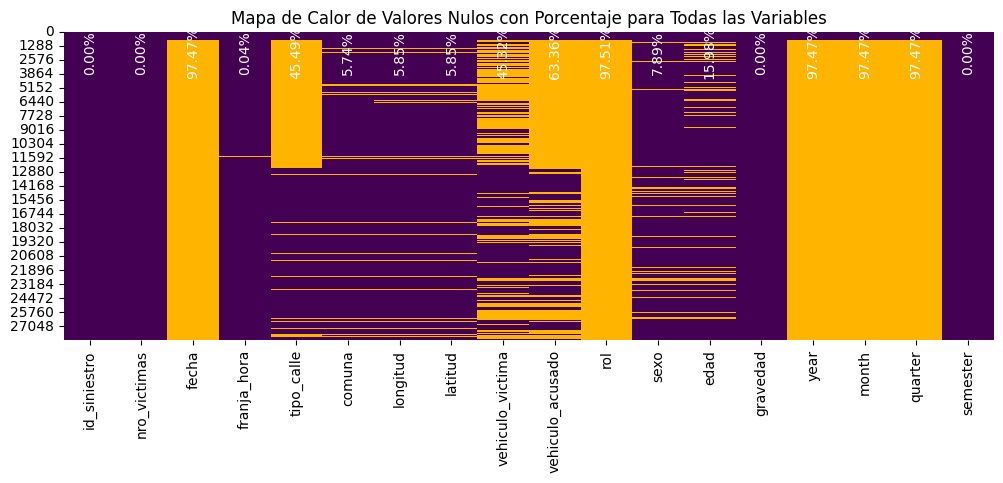

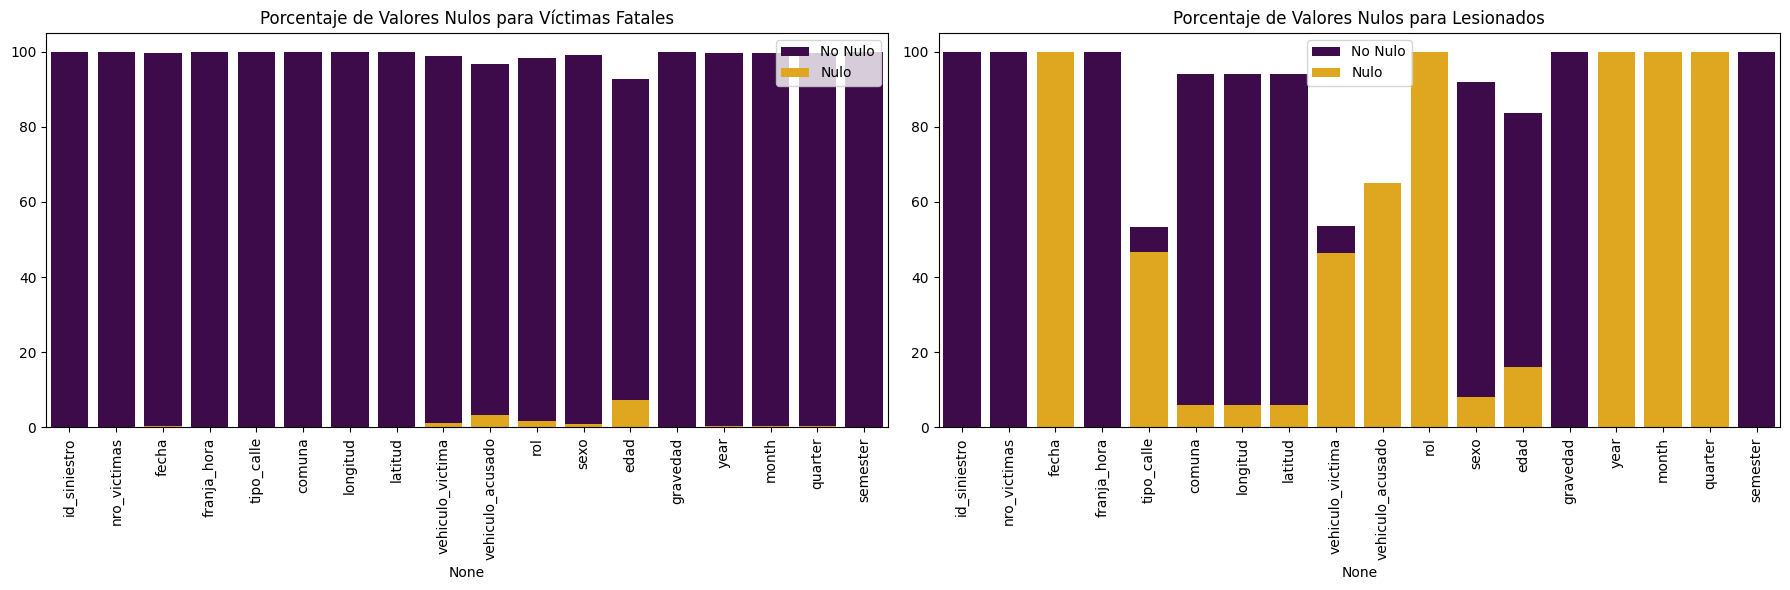

In [19]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = siniestros_df.isnull().mean() * 100

# Filtrar por víctimas fatales
fatal_df = siniestros_df[siniestros_df['gravedad'] == 'fatal']

# Filtrar por lesionados (gravedad diferente de fatal)
lesionados_df = siniestros_df[siniestros_df['gravedad'] != 'fatal']

# Calcular el porcentaje de valores nulos por columna para víctimas fatales
porcentaje_nulos_fatal = fatal_df.isnull().mean() * 100

# Calcular el porcentaje de valores nulos por columna para lesionados
porcentaje_nulos_lesionados = lesionados_df.isnull().mean() * 100

# Crear una paleta de colores personalizada
cmap_custom = sns.color_palette(['#440154', '#FFB400'])



# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(12, 4))
sns.heatmap(siniestros_df.isnull(), cbar=False, cmap=cmap_custom)

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(siniestros_df.columns.get_loc(col) + 0.5, 1900, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='white')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()



# Configurar subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Porcentaje de valores nulos para víctimas fatales
sns.barplot(x=porcentaje_nulos_fatal.index, y=100 - porcentaje_nulos_fatal.values, color=cmap_custom[0], label='No Nulo', ax=axes[0])
sns.barplot(x=porcentaje_nulos_fatal.index, y=porcentaje_nulos_fatal.values, color=cmap_custom[1], label='Nulo', ax=axes[0])
axes[0].set_title('Porcentaje de Valores Nulos para Víctimas Fatales')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].legend()

# Segundo gráfico: Porcentaje de valores nulos para lesionados
sns.barplot(x=porcentaje_nulos_lesionados.index, y=100 - porcentaje_nulos_lesionados.values, color=cmap_custom[0], label='No Nulo', ax=axes[1])
sns.barplot(x=porcentaje_nulos_lesionados.index, y=porcentaje_nulos_lesionados.values, color=cmap_custom[1], label='Nulo', ax=axes[1])
axes[1].set_title('Porcentaje de Valores Nulos para Lesionados')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].legend()

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

Los gráficos hablan por sí solos, con el color amarillo rápidamente podemos detectar la existencia de valores nulos. En la sección 3. Exploración del Conjunto de Datos: 'homicidios_cleaned', 'lesiones_cleaned', llevamos a cabo un análisis exhaustivo de los valores faltantes. En resumen, cuando abordemos las columnas con una cantidad significativa de valores ausentes, nos enfocaremos únicamente en los datos de siniestros viales con víctimas fatales, excluyendo así aquellos relacionados con siniestros viales con lesionados.

### Tratar Duplicados

A través de un gráfico de barras estaremos detectando la presencia de registros duplicados.

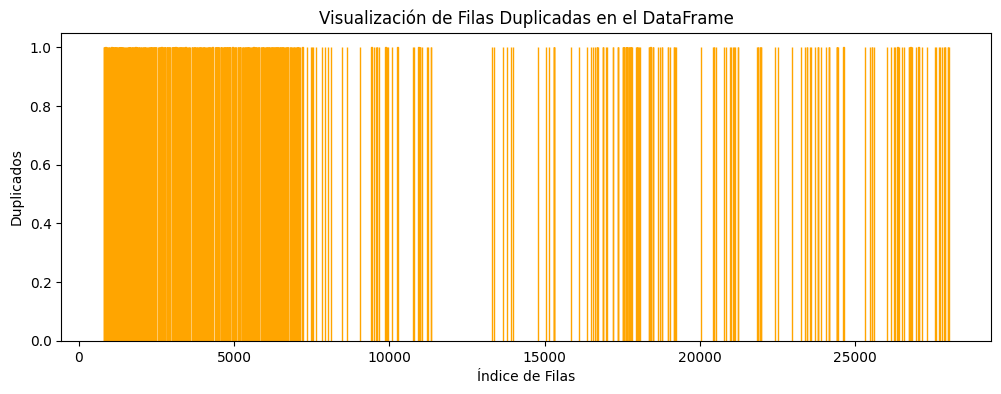

In [20]:
# Identificar filas duplicadas
filas_duplicadas = siniestros_df[siniestros_df.duplicated()]

# Crear un gráfico de barras para mostrar la cantidad de duplicados en cada fila
plt.figure(figsize=(12,4))
plt.bar(filas_duplicadas.index, height=1, color='red', edgecolor='orange', linewidth=1, label='Duplicados')
plt.title('Visualización de Filas Duplicadas en el DataFrame')
plt.xlabel('Índice de Filas')
plt.ylabel('Duplicados')
plt.show()

In [21]:
# Obtener filas duplicadas completas

filas_duplicadas = siniestros_df[siniestros_df.duplicated()]
print("\n\033[1mFilas duplicadas completas:")
filas_duplicadas


Filas duplicadas completas:


,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad,gravedad,year,month,quarter,semester
796,LC-2019-0006638,2,NaT,9,NaN,10,-58.496239,-34.636075,moto,NaN,NaN,masculino,37,leve,NaN,NaN,NaN,2
812,LC-2019-0008238,2,NaT,19,NaN,15,-58.479158,-34.590782,NaN,NaN,NaN,femenino,69,leve,NaN,NaN,NaN,2
818,LC-2019-0008388,3,NaT,20,NaN,15,-58.454242,-34.585794,NaN,NaN,NaN,femenino,<NA>,leve,NaN,NaN,NaN,2
835,LC-2019-0008860,3,NaT,6,NaN,4,-58.412835,-34.655086,transporte publico,NaN,NaN,masculino,67,leve,NaN,NaN,NaN,2
848,LC-2019-0009807,2,NaT,20,NaN,9,-58.465951,-34.658307,NaN,NaN,NaN,masculino,40,leve,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27912,LC-2021-0628972,8,NaT,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,NaN,NaN,NaN,2
27913,LC-2021-0628972,8,NaT,16,calle,11,-58.462417,-34.610534,auto,auto,NaN,NaN,<NA>,leve,NaN,NaN,NaN,2
27983,LC-2021-0631292,5,NaT,12,calle,12,-58.484141,-34.552869,NaN,NaN,NaN,femenino,<NA>,grave,NaN,NaN,NaN,2
27986,LC-2021-0631295,6,NaT,12,calle,8,-58.480641,-34.679476,NaN,NaN,NaN,femenino,50,leve,NaN,NaN,NaN,2
